## Introduction

This project will analyze data on GDP and life expectancy of six selected countries for the period 2000-2015. Our main goal is to identify the relationship between GDP and life expectancy for the countries in our sample.

During this project, we will load and prepare the data, analyze it with the help of plots, and explain the main findings from the study.

The main research questions we will seek to answer are the following:
- What is the distribution of both GDP and life expectancy?
- What is the average life expectancy for each country?
- What is the trend of GDP over time in the six countries?
- Has life expectancy increased over time in the six countries?
- Is there a linear relationship between GDP and life expectancy?


## Load and Inspect Data

Load the 'all_data.csv' dataset into a pandas DataFrame and perform an initial inspection to understand its structure, column names, data types, and check for any missing values.


In [1]:
# Import the pandas library for data manipulation
import pandas as pd

# Load the dataset 'all_data.csv' into a pandas DataFrame
df = pd.read_csv('all_data.csv')

# Display the first few rows of the DataFrame to get a glimpse of the data
print("First 5 rows of the DataFrame:")
print(df.head())

# Print a concise summary of the DataFrame, including data types and non-null values
print("\nDataFrame Information:")
df.info()

# Check for any missing values in each column and display the count
print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows of the DataFrame:
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB

Missing values per

## Prepare Data for Analysis

Clean and prepare the data for analysis. This step includes renaming columns for clarity (e.g., 'Life expectancy at birth (years)' to 'Life_Expectancy') and ensuring appropriate data types.


In [2]:
df = df.rename(columns={'Life expectancy at birth (years)': 'Life_Expectancy'})
print("DataFrame after renaming 'Life expectancy at birth (years)' to 'Life_Expectancy':")
print(df.head())
print("\nDataFrame Information after renaming:")
df.info()

DataFrame after renaming 'Life expectancy at birth (years)' to 'Life_Expectancy':
  Country  Year  Life_Expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10

DataFrame Information after renaming:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Exploratory Data Analysis

### Distribution of GDP

Our first step in to check which countries and years are included in the dataset. We can see that the six countries included are Chile, China, Germany, Mexico, United States of America and Zimbabwe. This is a mix of developed and developing countries so before analyzing the data further, we could expect large divergences in GDP and life expectancy between these countries.

In [3]:
# Find out the list of countries included in the dataset.
print(df['Country'].unique())

# Years included in the dataset.
print(df['Year'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


We will begin our analysis with a side-by-side boxplot to understand the distribution of GDP by country. As we expected, United States shows the higher GPD, followed by China. Chile and Zimbabwe, which are smaller economies, show significantly lower GDP numbers. Given that there is very large differences in GDP between countries, we can't comment much on the range of the variables. To have a better understanding would be useful to plot each country on a separate plot or we could also create a similar plot to the one below but using logs for the GDP variable.

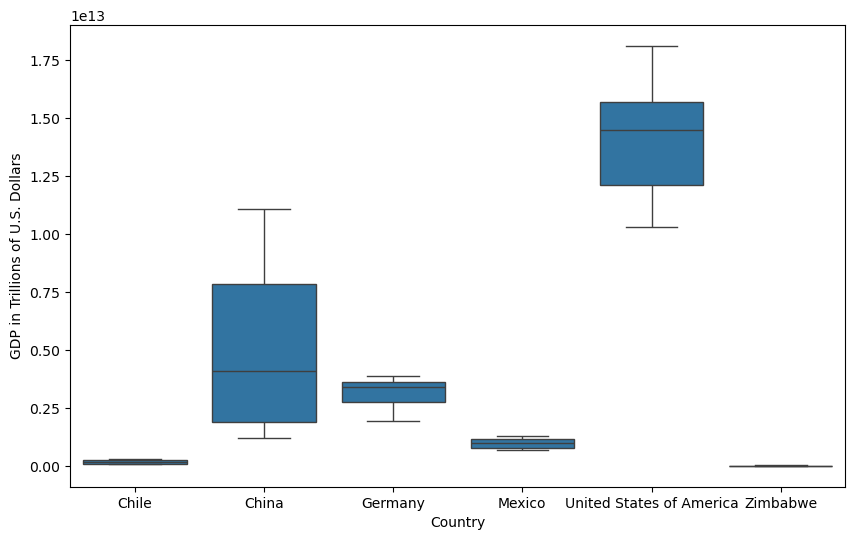

<Figure size 640x480 with 0 Axes>

In [4]:
# Import matplotlib and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Side-by-side boxplot of GDP by country.
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x = 'Country', y = 'GDP')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.xlabel('Country')
plt.show()
plt.clf()

We also explore the distribution of GDP across all countries and years using a histogram. We include a kernel density estimate to produce a smooth, continuous curve that help us to better understand the underlying distribution.

The histogram for GDP across all countries and years shows a highly right-skewed distribution. The majority of data points are concentrated at the lower end of the GDP spectrum, indicating that most countries in our dataset have relatively lower GDP values. There's a long tail extending towards higher GDP values, which represents the economies with very large GDPs (e.g., United States and China in later years). This distribution suggests significant economic disparity among the selected countries, with a few outliers having exceptionally high GDPs. The `kde` (Kernel Density Estimate) curve further illustrates this right-skewness, peaking at the lower GDP values and gradually declining as GDP increases.

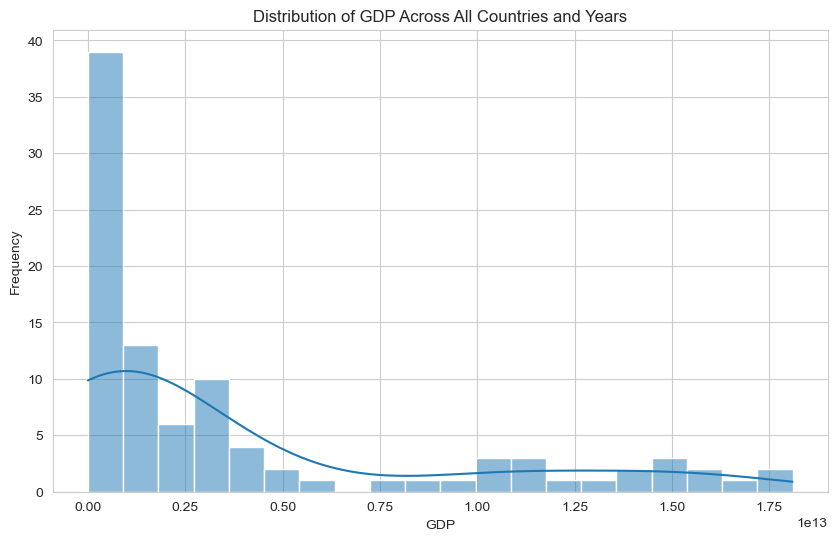

In [5]:
# Create and show distribution chart for GDP.
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='GDP', bins=20, kde=True)
plt.title('Distribution of GDP Across All Countries and Years')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Distribution of Life Expectancy

Then we examine the distribution of Life Expectancy. We can see from the side-by-side boxplot that most of the countries have a median life expectancy at birth in the range of mid-70-80 years. Germany seems to have the largest life expectancy, with a median around 80 years.
The spread of the data seems similar for all countries except for Zimbabwe which presents the greatest variability.


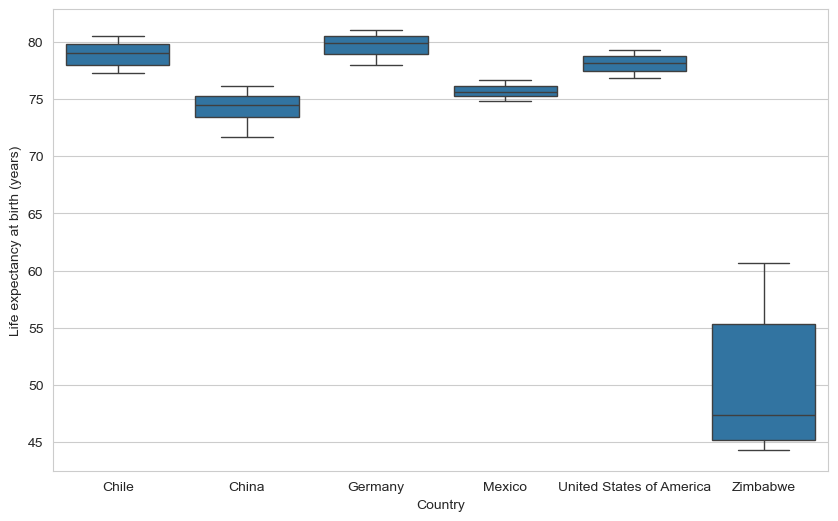

In [6]:
# Side-by-side boxplot of Life Expectancy by country.
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x = 'Country', y = 'Life_Expectancy')
plt.ylabel('Life expectancy at birth (years)')
plt.xlabel('Country')
plt.show()

The histogram for life expectancy shows a distribution that is heavily left-skewed. The majority of the life expectancy data points are concentrated in the range of 70 to 80 years, with a significant peak around the late 70s. This indicates that most of the countries in the dataset generally have high life expectancies. There is also a distinct cluster of lower life expectancy values, primarily representing Zimbabwe, which pulls the distribution to the left at the lower end of the scale. The KDE (Kernel Density Estimate) curve illustrates this bimodal tendency, with a main peak at higher life expectancies and a smaller peak or spread at much lower values. This distribution suggests a general success in achieving high life expectancies across most of the sample, with one clear outlier having significantly lower life expectancy.

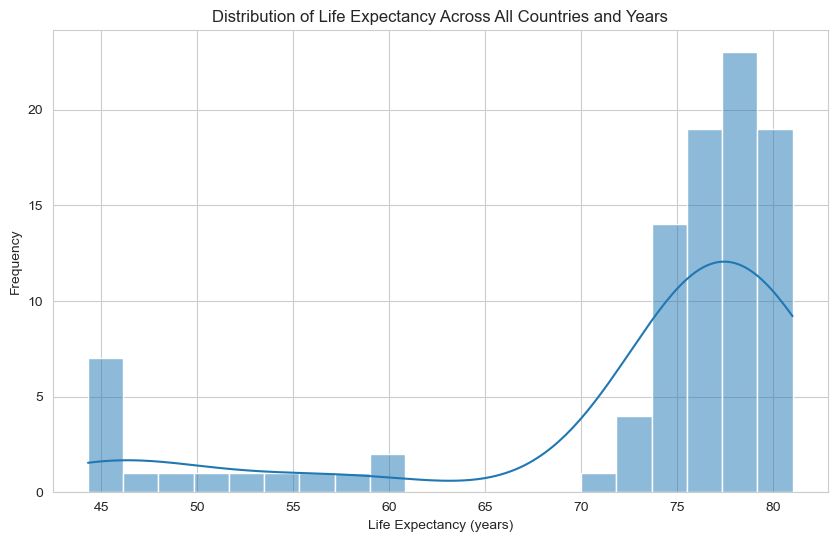

In [7]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Life_Expectancy', bins=20, kde=True)
plt.title('Distribution of Life Expectancy Across All Countries and Years')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Average GDP and Life Expectancy by Country

Average Life Expectancy by Country:
                    Country  Life_Expectancy
0                     Chile         78.94375
1                     China         74.26250
2                   Germany         79.65625
3                    Mexico         75.71875
4  United States of America         78.06250
5                  Zimbabwe         50.09375

Average GDP by Country:
                    Country           GDP
0                     Chile  1.697888e+11
1                     China  4.957714e+12
2                   Germany  3.094776e+12
3                    Mexico  9.766506e+11
4  United States of America  1.407500e+13
5                  Zimbabwe  9.062580e+09


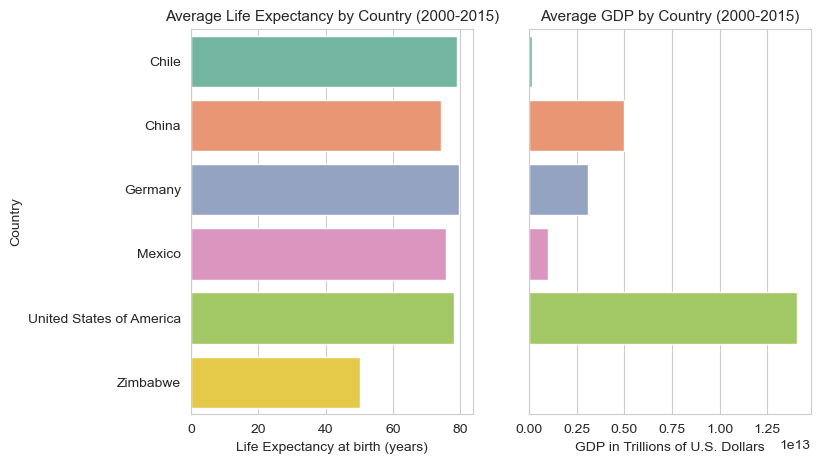

<Figure size 640x480 with 0 Axes>

In [8]:
# Calculate the mean life expectancy and GDP for each country
avg_life_expectancy = df.groupby('Country')['Life_Expectancy'].mean().reset_index()
avg_gdp = df.groupby('Country')['GDP'].mean().reset_index()

# Display the calculated average
print("Average Life Expectancy by Country:")
print(avg_life_expectancy)
print("\nAverage GDP by Country:")
print(avg_gdp)

# Create two bar plots to visualize the average life expectancy and GDP for each country

fig, axes = plt.subplots(1, 2, sharey = True, figsize = (8,5))
axes[0] = sns.barplot(ax = axes[0], data = avg_life_expectancy, x = 'Life_Expectancy', y = 'Country', hue = 'Country', palette = 'Set2')
axes[0].set_xlabel('Life Expectancy at birth (years)')
axes[0].set_title('Average Life Expectancy by Country (2000-2015)', fontdict = {'fontsize' : 11})
axes[1] = sns.barplot(ax = axes[1], data = avg_gdp, x = 'GDP', y = 'Country', hue = 'Country', palette = 'Set2')
axes[1].set_xlabel('GDP in Trillions of U.S. Dollars')
axes[1].set_title('Average GDP by Country (2000-2015)', fontdict = {'fontsize' : 11})
plt.show()
plt.clf()

Based on the bar plot above and the calculated average life expectancies for the period 2000-2015:

*   **Highest Life Expectancy**: Germany has the highest average life expectancy among the six countries, with an average of 79.66 years.
*   **Lowest Life Expectancy**: Zimbabwe has the significantly lowest average life expectancy, with an average of 50.09 years. This is considerably lower than all other countries in the sample.
*   **Mid-Range Life Expectancy**: Chile (78.94 years) and the United States of America (78.06 years) have similarly high average life expectancies, closely following Germany. Mexico (75.72 years) and China (74.26 years) fall in the middle range, showing good life expectancy figures, though slightly lower than the top three.
*   **Notable Observation**: The stark contrast between Zimbabwe's average life expectancy and the other countries highlights significant disparities in health outcomes, possibly due to varying levels of economic development, healthcare infrastructure, and other socio-economic factors. The other five countries show relatively high and convergent average life expectancies, suggesting a baseline of good health standards.

Following a similar analysis for the GDP during the same period:

*   **Highest GDP**: United States has the highest average GDP among the six countries, with an average of 14.08 trillion U.S. dollars.
*   **Lowest GDP**: Zimbabwe has the significantly lowest GDP, with an average of approximately 6 billions U.S. dollars. This is considerably lower than all other countries, it represents only 5.3% of Chile GDP which is the smallest economy after Zimbabwe. This is the reason why it appears there is no GDP data on the chart for Zimbabwe.
*   **Large economies**: China is the second largest economy with an average of 4.96 trillion U.S. dollars, followed by Germany (3.09 trillion U.S. dollars). Mexico's average GDP is 976.65 billions U.S. dollars and represent one of the largest economies in the Latin America region. 
*   **Important Observation**: the GDP data used for this analysis is in current U.S. dollars which is not ideal to make comparisons among countries. GDP expressed in constant international dollars, converted by purchasing power parities would be more appropiate to capture the fact that different countries have different price levels. We could investigate into this further.

### GDP Trends Over Time

We analyze trends of GDP by country for the period 2000-2015 in the chart below. Overall, all of the countries experienced economic growth during this period, with China showing explosive growth and Germany, Mexico, Chile and Zimbabwe lagging significantly behind. United States of America had the highest GDP at the beginning of the period and continues to show a strong, consistent upward trend, maintaining its position as an economic powerhouse.

It is important to note that GDP is in current dollars, and for that reason, economic growth could be overestimated. In addition, given the large discrepancies in size of the economies, we can not visualize the GDP trends for the smaller economies such as Zimbabwe in the first lineplot. We will create a facet plot using the seaborn library to solve this issue.

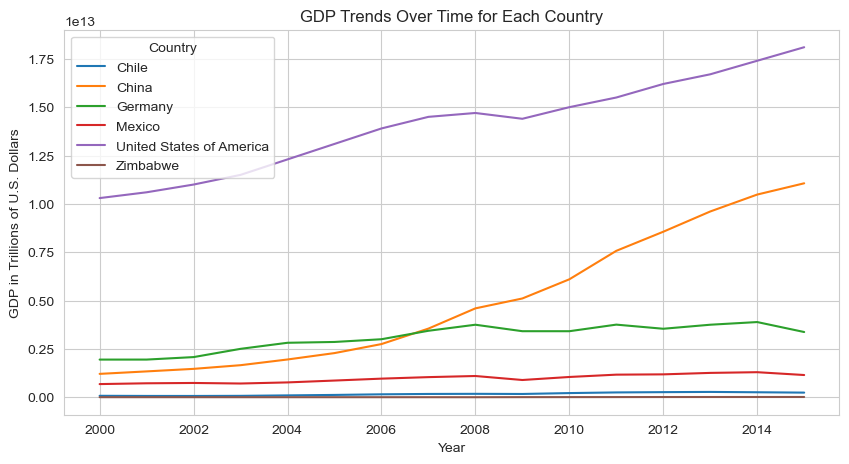

In [17]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.title('GDP Trends Over Time for Each Country')
plt.xlabel('Year')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.legend(title='Country', loc = 2)
plt.grid(True)
plt.show()

In the chart below we can visualize much better the GDP trends for all countries. Compared to the previous chart, it is more noticeable the GDP growth trends for the smaller economies. These are a few additional findings:
* Germany grew until 2008 and shows an economic stagnation since then. 
* All countries except for China and Zimbabwe show a decline in GDP in 2008 which is likely explained by the Global Financial Crisis.
* Zimbabwe shows a decline in GDP in the period 2000-2008, followed by a strong growth in GDP. This behaviour could be investigated further.

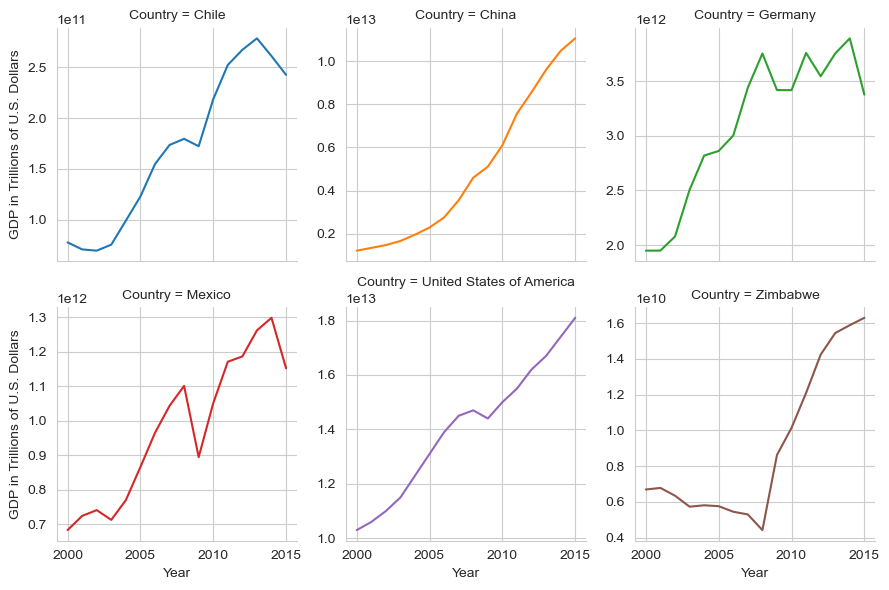

In [10]:
gdp_facet = sns.FacetGrid(data = df, col = 'Country', hue = 'Country',
                          col_wrap = 3, sharey = False)
gdp_facet.map(sns.lineplot, 'Year', 'GDP')
gdp_facet.set_axis_labels('Year', 'GDP in Trillions of U.S. Dollars')

### Life Expectancy Trends Over Time 

The line plots below illustrate the life expectancy trends for the six selected countries from 2000 to 2015. All countries display an increase in life expectancy throughout the whole period although at different growth rates.

* Zimbabwe stands out with a life expectancy that was significantly lower than other countries in 2000 (around 46 years). It experienced a decline in the early 2000s, followed by a remarkable and steep recovery and increase from around 2004 onwards, reaching over 60 years by 2015. This pattern correlates with its GDP trend and suggests a period of crisis followed by significant public health interventions and improvements.

* China exhibits a strong upward trend in life expectancy, similar to its GDP growth. Life expectancy increased significantly, suggesting substantial advancements in public health and healthcare services.

* Chile and Germany evidence a consistent increase of 3.2 and 3 years in life expectancy during the period, respectively, and  show the highest levels of life expectancy at around 81 years in 2015.

* Mexico and the United States also show an increase in life expectancy during the period, although the growth rate appears somewhat flatter compared to the other countries.

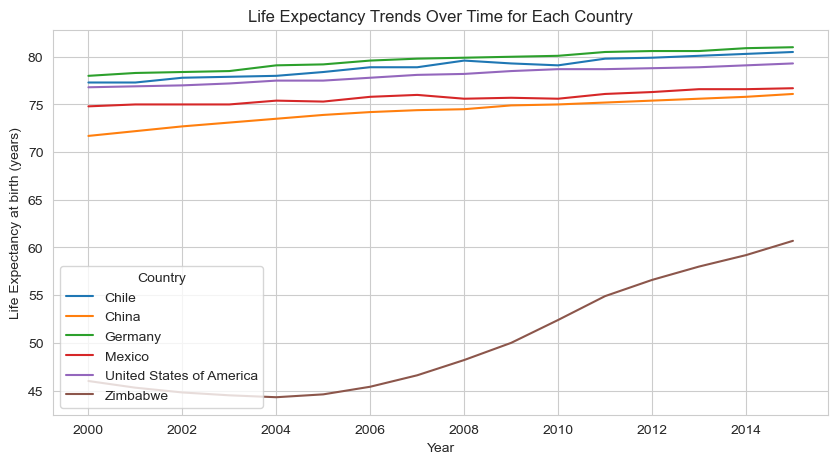

In [25]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='Life_Expectancy', hue='Country')
plt.title('Life Expectancy Trends Over Time for Each Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at birth (years)')
plt.legend(title='Country', loc = 3)
plt.grid(True)
plt.show()

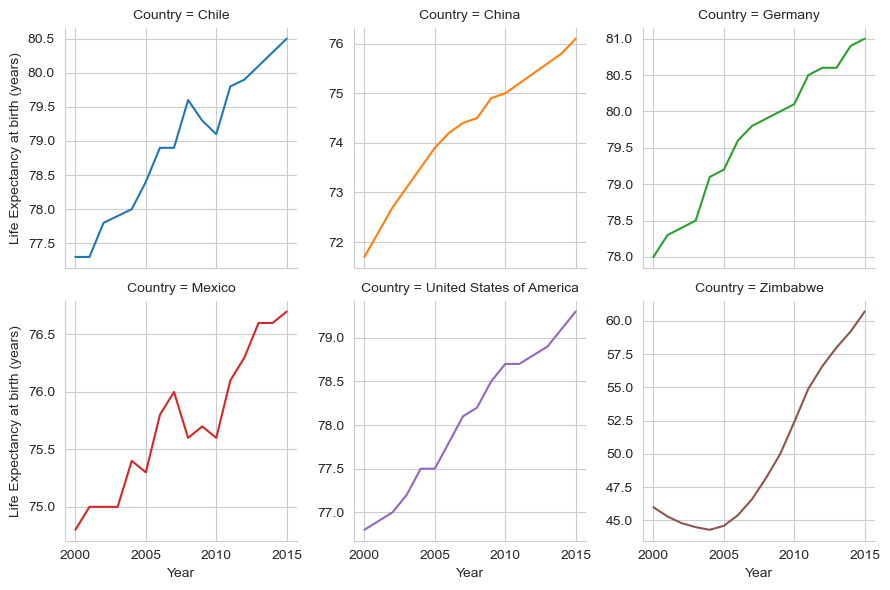

In [26]:
gdp_facet = sns.FacetGrid(data = df, col = 'Country', hue = 'Country',
                          col_wrap = 3, sharey = False)
gdp_facet.map(sns.lineplot, 'Year', 'Life_Expectancy')
gdp_facet.set_axis_labels('Year', 'Life Expectancy at birth (years)')

### Explore Relationship Between GDP and Life Expectancy

The scatter plots below visualize the relationship between GDP and life expectancy for the six countries from 2000 to 2015:

*   **General Trend**: For all countries, it appears to be a positive correlation between GDP and life expectancy; as GDP increases, life expectancy also tends to increase. This is particularly evident for countries like China, where both metrics showed a strong upward trend over the years.

*   **Linearity**: The relationship is not strictly linear for all countries across the entire range of GDP values. For countries with lower GDP values (e.g., Zimbabwe, and potentially China in its earlier years), a given increase in GDP seems to correspond to a more significant increase in life expectancy. However, for countries with already very high GDPs (e.g., USA, Germany), further increases in GDP appear to yield diminishing returns in terms of life expectancy gains, indicating a flattening of the curve at higher GDP levels. To further study this relationship, GDP per capita could be used to control for the size of the economy.

*   **Country-Specific Observations**:
    *   **Zimbabwe**: Shows a clear positive correlation. As its GDP, though low compared to others, increased after 2004, its life expectancy also saw a significant recovery and increase. The points for Zimbabwe are clustered at the lower end of both GDP and Life Expectancy scales.
    *   **Chile, China, Mexico, Germany, USA**: These countries generally show an upward-sloping cluster of points, indicating that higher GDP is associated with higher life expectancy. However, the GDP scale for these countries is vast. For instance, the USA and Germany have very high GDPs with very high life expectancies, while China shows a wide range of GDPs corresponding to a substantial increase in life expectancy.

*   **Ceiling Effect**: It seems there might be a 'ceiling effect' on life expectancy. While GDP can continue to grow to very large numbers, life expectancy tends to plateau once a certain level of economic development and healthcare quality is achieved, suggesting that beyond a certain point, other factors might become more dominant in influencing life expectancy. As mentioned before, GDP per capita could be used to have a better comparison of living standards and economic prosperity among countries.

In conclusion, a positive relationship between GDP and life expectancy is apparent across most countries, but it is not uniformly linear. The impact of GDP on life expectancy appears to be more pronounced at lower levels of economic development, with the relationship becoming less steep as GDP grows very large.

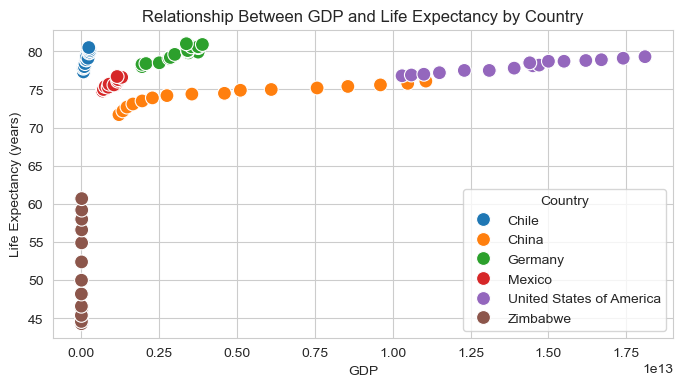

<Figure size 640x480 with 0 Axes>

In [29]:
import numpy as np
df['GDP_log'] = np.log(df['GDP'])

sns.set_style('whitegrid')

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='GDP', y='Life_Expectancy', hue='Country', s=100) # s for marker size
plt.title('Relationship Between GDP and Life Expectancy by Country')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')
plt.legend(title='Country')
plt.grid(True)
plt.show()
plt.clf()

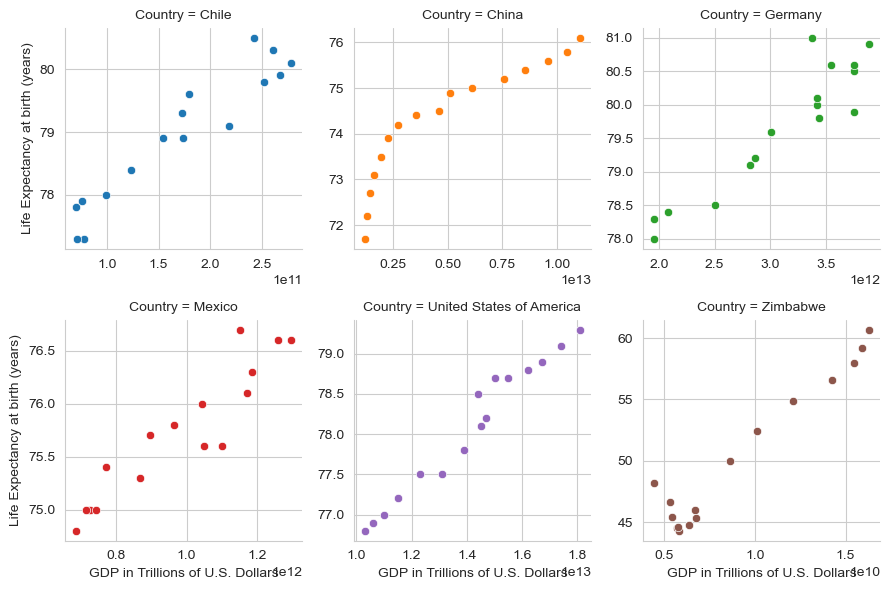

In [34]:
gdp_facet = sns.FacetGrid(data = df, col = 'Country', hue = 'Country',
                          col_wrap = 3, sharey = False, sharex = False)
gdp_facet.map(sns.scatterplot, 'GDP', 'Life_Expectancy')
gdp_facet.set_axis_labels('GDP in Trillions of U.S. Dollars', 'Life Expectancy at birth (years)')
#gdp_facet.set(ylim = (70, 82))

### Conclusion and Main Findings

This project analyzed GDP and life expectancy data for six selected countries (Chile, China, Germany, Mexico, United States of America, and Zimbabwe) between 2000 and 2015, aiming to understand the relationship between these two variables, their trends over time, and their distributions.

### Key Findings:

1.  **Distribution of GDP**: The distribution of GDP was highly right-skewed, with most data points concentrated at the lower end of the distribution and a long tail extending to very high GDP values (primarily from the USA and China). This indicates significant differences on the size of the economy, and economic prosperity, among the countries.

6.  **Distribution of Life Expectancy**: The distribution is heavily left-skewed, with the majority of the life expectancy data points concentrated in the range of 70 to 80 years, with a significant peak around the late 70s. This distribution suggests a general success in achieving high life expectancies across most of the countries in the dataset, with one clear outlier, Zimbabwe, having significantly lower life expectancy.

1.  **GDP Trends Over Time**: All countries demonstrated economic growth during the period 2000-2015. China experienced explosive growth, catching up with the U.S. GDP. The United States also showed strong, consistent growth, keeping the first place as the largest economy. Notably, although Zimbabwe is the smaller economy in our sample, it has shown a very strong growth since 2008.

4.  **Life Expectancy Trends Over Time**: A general upward trend in life expectancy was observed across all countries. China exhibits a strong upward trend in life expectancy, similar to its GDP growth. Life expectancy increased significantly, suggesting substantial advancements in public health and healthcare services. Chile and Germany show consistent increase and the highest levels of life expectancy at around 81 years in 2015. Mexico and the United States also show an increase in life expectancy during the period, although the growth rate appears somewhat flatter compared to the other countries. Zimbabwe, notably, showed a remarkable improvement in life expectancy after an initial decline in the early 2000s, suggesting successful public health interventions following a period of crisis.

6.  **Average Life Expectancy**: Germany has the highest average life expectancy (79.66 years), followed closely by Chile and the USA. Zimbabwe, despite improvements in recent years, had a significantly lower average life expectancy (50.09 years), highlighting stark disparities in health outcomes.

6.  **Relationship Between GDP and Life Expectancy**: A positive correlation exists between GDP and life expectancy. As GDP increases, life expectancy generally tends to rise. However, this relationship is not strictly linear; at very high GDP levels, the gains in life expectancy appear to diminish, suggesting a 'ceiling effect' where further economic growth has less impact on extending lifespan. This is evident in the case of China where the initial increases of GDP in the early 2000's appear to correspond to more significant gains in life expectancy.

In conclusion, while economic prosperity, as measured by GDP, generally correlates positively with improved life expectancy, the impact appear to be more significant at lower levels of development. Countries with robust economies and healthcare systems tend to maintain high and gradually increasing life expectancies. The analysis highlights both the global progress in health and economic development, as well as persistent disparities.